Luis Adolfo Martínez 
**22000352** 

Objetivo: Teniendo un datase de noticias se busca crear un modelo para la clasificación de noticas si estas son reales o falsas

In [1]:
import tensorflow as tf
import keras as keras
from keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd
import datetime
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from tensorflow.keras import optimizers
from tensorflow.python.keras.optimizers import TFOptimizer
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential



In [2]:
import os.path
from os import path

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
direccion = "/content/drive/MyDrive/TextMining/Archivos/RNN"
os.chdir(direccion)

Carga de datos y exploracion de datos

In [5]:
dataset=pd.read_csv('train.csv')

In [6]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
class funciones:
  def __init__(self,data):
       self.data = data
  def removeNA(self):
    return self.data.dropna()
  def tokenizacion(self,features,filter,lower,split):
    tokenizer = Tokenizer(num_words = features, filters=filter, lower = lower, split = split)
    tokenizer.fit_on_texts(texts = self.data)
    title = tokenizer.texts_to_sequences(texts = self.data)
    return title,tokenizer
  def fitmodel(self,modelo,y,epoch,verbose,val):
    history = modelo.fit(self.data,y, epochs=epoch, validation_split=val,verbose=verbose)
    return history
  def plotear(self,title):
    #def plot_graphs(history, string):
    plt.plot(self.data.history[title])
    plt.plot(self.data.history['val_'+title])
    plt.xlabel("Epochs")
    plt.ylabel(title)
    plt.legend([title, 'val_'+title])
    plt.show()

In [8]:
funcion = funciones(dataset)
dataset = funcion.removeNA()


In [9]:
dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


Separamos la etiqueta nuestra columna label

In [10]:
y = dataset['label']
y.shape

(18285,)

In [11]:
title = dataset['title']

In [12]:
title

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: title, Length: 18285, dtype: object

In [13]:
longitud = []
[longitud.append(len(str(text))) for text in dataset['title']]
dataset['tamaño'] = longitud

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
dataset

,id,title,author,text,label,tamaño
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,55
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,33
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,63
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,93
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,55
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,65
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,80
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,50


In [15]:
features = 500
filter = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
funcion = funciones(title)

Tokenizacion para el titulo

In [16]:
titleTokin,tokenizacion = funcion.tokenizacion(features,filter,True,' ')
titleTokin = pad_sequences(sequences = titleTokin, maxlen = features, padding = 'pre')

In [17]:
word_index = tokenizacion.word_index
print('Tokens')
print(len(word_index))

Tokens
25794


In [18]:
tamaño_vocabulary=min(len(word_index)+1,features)
tamaño_vocabulary

500

In [20]:
checkpoint_dir = os.path.dirname('cnn.ckpt')
save_prog = ModelCheckpoint(
    filepath = 'cnn.ckpt',
    verbose = 1,
    save_weights_only =True,
    save_freq=5
)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(titleTokin, y, test_size = 0.2, random_state = 101)

Modelo 1 LSTM  -memoria a largo plazo-    Long short-term memory, para almacenar palabras a largo plazo relevantes

In [22]:
model1lstm = Sequential(name='lstm1')
model1lstm.add(Embedding(input_dim = features, output_dim =  32))
model1lstm.add(Bidirectional(tf.keras.layers.LSTM(32)))
model1lstm.add(Dense(32, activation='relu'))
model1lstm.add(Dense(1))

In [23]:
model1lstm.summary()

Model: "lstm1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          16000     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 34,753
Trainable params: 34,753
Non-trainable params: 0
_________________________________________________________________


In [24]:
model1lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [25]:
funcion = funciones(titleTokin)
history  = funcion.fitmodel(model1lstm,y,4,1,0.2)

Epoch 1/4
458/458 [==============================] - 171s 364ms/step - loss: 0.4908 - accuracy: 0.7998 - val_loss: 0.5391 - val_accuracy: 0.6090
Epoch 2/4
458/458 [==============================] - 167s 364ms/step - loss: 0.2529 - accuracy: 0.9009 - val_loss: 0.3905 - val_accuracy: 0.7657
Epoch 3/4
458/458 [==============================] - 167s 365ms/step - loss: 0.2362 - accuracy: 0.9007 - val_loss: 0.2615 - val_accuracy: 0.9065
Epoch 4/4
458/458 [==============================] - 166s 362ms/step - loss: 0.2098 - accuracy: 0.9219 - val_loss: 0.2732 - val_accuracy: 0.9100


Realizamos el segundo Modelo 2 LSTM

In [26]:
model2lstm = Sequential(name='lstm2')
model2lstm.add(Embedding(input_dim = features, output_dim =  32))
model2lstm.add(Bidirectional(tf.keras.layers.LSTM(32,  return_sequences=True)))
model2lstm.add(Bidirectional(tf.keras.layers.LSTM(32))),
model2lstm.add(Dense(32, activation='relu'))
model2lstm.add(Dropout(0.5))
model2lstm.add(Dense(1))
model2lstm.summary()

Model: "lstm2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          16000     
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 64)         16640     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33    

In [27]:
model2lstm.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.001),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
funcion = funciones(titleTokin)
history2  = funcion.fitmodel(model2lstm,y,3,1,0.2)

Epoch 1/3
458/458 [==============================] - 352s 753ms/step - loss: 0.4573 - accuracy: 0.8009 - val_loss: 0.3078 - val_accuracy: 0.9095
Epoch 2/3
458/458 [==============================] - 341s 745ms/step - loss: 0.3811 - accuracy: 0.8725 - val_loss: 0.4625 - val_accuracy: 0.6617
Epoch 3/3
458/458 [==============================] - 341s 745ms/step - loss: 0.3560 - accuracy: 0.8898 - val_loss: 0.3147 - val_accuracy: 0.8764


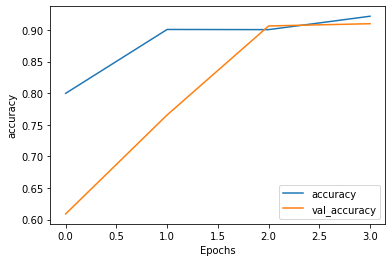

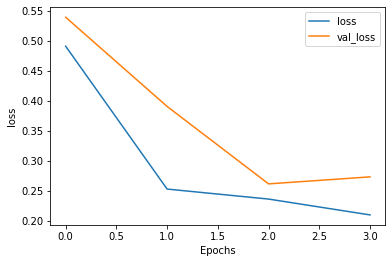

In [29]:
funcion = funciones(history)
funcion.plotear('accuracy')
funcion.plotear('loss')

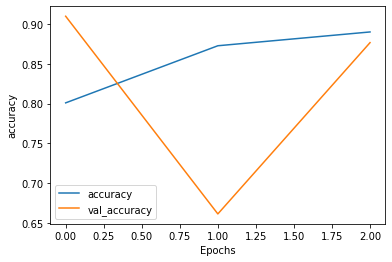

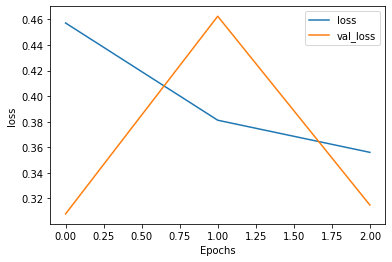

In [30]:
funcion = funciones(history2)
funcion.plotear('accuracy')
funcion.plotear('loss')

In [34]:
fechaHora = datetime.now().strftime("%Y%m%d-%H%M%S")
fechaHora
try:
    model2lstm.save('rnn_' + fechaHora)
except:
    print("Genera una excepcion pero guarda el archivo")

Matriz de confusion y resultado final de accuracy de word2vec

In [35]:
y_pred = model2lstm.predict(X_test)

In [36]:
#y_pred =np.round(y_pred).astype(int)
y_pred1 =np.argmax(y_pred,axis=-1)

A pesar que se utilizaron librerias y modelos que ayudan a facilitar el trabajo la creación de este modelo requiere de un esfuerzo muy grande.

EL modelo realizado obtuvimos un precision arriba del 81 %.
**Recomendaciones** utilizar word2vec preentrendo de una base de datos de GoogleNews en futuros modelos para la predicción de noticas falsas para obtener  accuracy más alto, pero requiero un costo computacional elevado.